# Primer programa de ML para clasificación
## K vecinos mas cercanos (KNN)

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier  # Libreria para implementar k vecinos mas cercanos
from sklearn.metrics import plot_confusion_matrix   # Para hacer una matriz de confusión (para evaluar que tan bueno es el modelo)
from sklearn import metrics

In [6]:
# Paso 1: Lectura de los datos

datos=pd.read_csv("C:/Users/alber/Escritorio/Machine Learning/datos/estatura_peso.csv")
datos.head()

,gender,height,weight
0,0,63.2,168.7
1,0,68.7,169.8
2,0,64.8,176.6
3,0,67.9,246.8
4,1,68.9,151.6


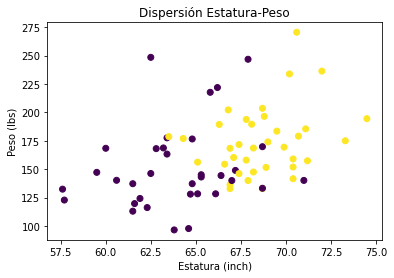

In [7]:
# Paso 2: Pre-procesamiento de los datos
# Análisis exploratorio de datos
# Limpieza de los datos

plt.title("Dispersión Estatura-Peso")
plt.xlabel("Estatura (inch)")
plt.ylabel("Peso (lbs)")
plt.scatter(x=datos["height"],y=datos["weight"],c=datos["gender"])    # Realiza una gráfica de dispersión

In [8]:
# Dimensión de los datos: cuántos datos y covariables tiene el dataframe

N = len(datos)
N

# Identificar los atributos/covariables y la variable objetivo/target

X=datos[["height","weight"]]  # Atributos
Y=datos["gender"]             # Objetivo

# Queremos construir una funciín f --->  f(x)=y

In [9]:
# Entrenamos al algoritmo (memorizar los datos)

Knn=KNeighborsClassifier(n_neighbors=8).fit(X,Y)

In [10]:
# Predicciones

y_pred=Knn.predict(X)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1], dtype=int64)

c:\Users\alber\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


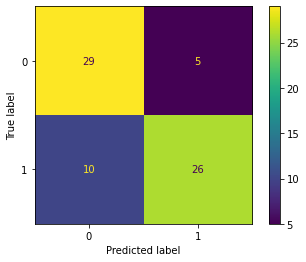

In [11]:
# Hacemos una matriz de confusión para ver que tan bien predijo

plot_confusion_matrix(Knn,X,Y)

In [12]:
# Podemos tener un algoritmo con un buen desempeño, pero en la practica con datos que el modelo no ha visto o datos nuevos, tenga un mal desempeño

# Necesitamos ver que tan bueno es el algoritmo en datos nuevos o datos que no ha visto.

# ¿ Cómo hacemos para evaluar el modelo?

In [13]:
np.random.seed(1234)
sorteo=np.random.choice(2,70,p=[0.3,0.7])   # 1 Seleccionamos el registro para entrenar
                                            # y 0 para el conjunto de prueba
sorteo

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0])

In [14]:
sum(sorteo)

52

In [15]:
# Vamos a construir el conjunto de datos de entrenamiento y de prueba

datos_entrenamiento=datos[sorteo==1]
datos_prueba=datos[sorteo==0]

In [16]:
datos_prueba

,gender,height,weight
0,0,63.2,168.7
5,1,67.8,158.0
6,1,68.2,168.6
17,1,66.9,132.9
22,0,61.5,113.0
33,1,63.5,178.7
36,1,68.1,189.6
40,0,65.8,217.7
41,0,68.7,133.2
42,0,63.8,96.5


In [19]:
# Seleccionamos los atributos y la variable objetivos del conjunto de entrenamiento

X_entrenamiento=datos_entrenamiento[["height","weight"]]  # Atributos
Y_entrenamiento=datos_entrenamiento["gender"]             # Variable objetivo o target

# Seleccionamos los atributos y la variable del conjunto de prueba

X_prueba=datos_prueba[["height","weight"]]  # Atributos
Y_prueba=datos_prueba["gender"]             # Variable objetivo o target

In [20]:
# Vamos a entrenar al algoritmo, en este caso Knn con k=3

K_vecinos=KNeighborsClassifier(n_neighbors=3).fit(X_entrenamiento,Y_entrenamiento)

In [33]:
# Veamos que tan bien predice el modelo en el conjunto de entrenamiento (aunque es una mala practica hacer esto)

predicciones=K_vecinos.predict(X_entrenamiento)
predicciones

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

c:\Users\alber\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.8846153846153846

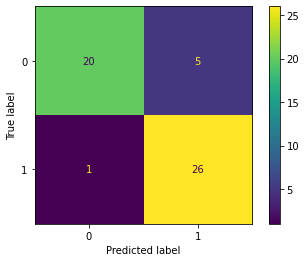

In [34]:
plot_confusion_matrix(K_vecinos,X_entrenamiento,Y_entrenamiento)    # Medición optimista del algoritmo de k vecinos mas cercanos
                                                                    # La matriz de confusión me ayuida a identificar que casos le cuesta mas trabajo al método clasificar,
                                                                    # dicho de otro modo, en donde se equivoca mas el algoritmo
                                                                    # El porcentaje de exactitud de casos que se predicen correctamente es de 88.5%
metrics.accuracy_score(Y_entrenamiento,predicciones)

Para tener una medida real del desempeño del algoritmo, necesitamos probarlo con datos que no ha visto (conunto de prueba)

[0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1]


c:\Users\alber\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.7777777777777778

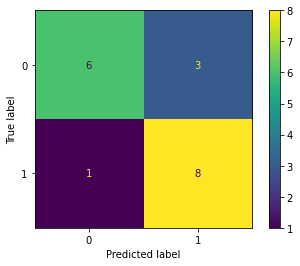

In [35]:
predicciones=K_vecinos.predict(X_prueba)
print(predicciones)
plot_confusion_matrix(K_vecinos,X_prueba,Y_prueba)
metrics.accuracy_score(Y_prueba,predicciones)
# Observamos en la matriz una exactitud del 77.4% con datos que no ha visto el programa